Exploratory Data Analysis(EDA) - Top fortunate companies
==

LAXMAN PATEL GRIP Batch - July_25

Dataset - path = kagglehub.dataset_download("rm1000/fortune-500-companies")

TASK: As buisness analyst this insights can be drawn from this dataset
1. Industry Performance Trends
  * how industries evolve around years(in which sector demand is more)
2. Geographic Concentration & Expansion
  * which state made more revenue(liquidity)
3. Workforce & Employment
  * number of empoyees varies over the years per industry
4. Financial Health & Stability
 * profit/revenue ratio per industry over years

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
top_companies=pd.read_csv('Fortune 500 Companies.csv')

In [3]:
top_companies

,name,rank,year,industry,sector,headquarters_state,headquarters_city,market_value_mil,revenue_mil,profit_mil,asset_mil,employees,founder_is_ceo,female_ceo,newcomer_to_fortune_500,global_500
0,General Motors Corporation,1,1996,Motor Vehicles & Parts,NaN,MI,NaN,NaN,168828.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ford Motor Company,2,1996,Motor Vehicles & Parts,NaN,MI,NaN,NaN,137137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Exxon Corporation,3,1996,Petroleum Refining,NaN,TX,NaN,NaN,110009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Wal-Mart Stores, Inc.",4,1996,General Merchandisers,NaN,AR,NaN,NaN,93627.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AT&T Corp.,5,1996,Telecommunications,NaN,NY,NaN,NaN,79609.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13935,KKR,496,2023,Securities,Financials,NY,New York,45225.0,7273.0,841.0,277077.0,4150.0,no,no,no,no
13936,Equinix,497,2023,Real Estate,Financials,CA,Redwood City,66873.0,7263.0,704.0,30311.0,12097.0,no,no,no,no
13937,Sonoco Products,498,2023,"Packaging, Containers",Materials,SC,Hartsville,5975.0,7251.0,466.0,7053.0,22000.0,no,no,yes,no
13938,ServiceNow,499,2023,Computer Software,Technology,CA,Santa Clara,94338.0,7245.0,325.0,13299.0,20433.0,no,no,yes,no


In [16]:
top_companies.shape

(13940, 16)

In [17]:
top_companies.isnull().sum()

name                          0
rank                          0
year                          0
industry                      0
sector                     9440
headquarters_state            0
headquarters_city          6445
market_value_mil           8755
revenue_mil                   0
profit_mil                 8443
asset_mil                  8440
employees                  9440
founder_is_ceo             9440
female_ceo                 9440
newcomer_to_fortune_500    9440
global_500                 9940
dtype: int64

In [5]:
df = top_companies.drop(columns=[ 'founder_is_ceo', 'female_ceo', 'newcomer_to_fortune_500', 'global_500'])

array([[<Axes: title={'center': 'rank'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'market_value_mil'}>],
       [<Axes: title={'center': 'revenue_mil'}>,
        <Axes: title={'center': 'profit_mil'}>,
        <Axes: title={'center': 'asset_mil'}>],
       [<Axes: title={'center': 'employees'}>, <Axes: >, <Axes: >]],
      dtype=object)

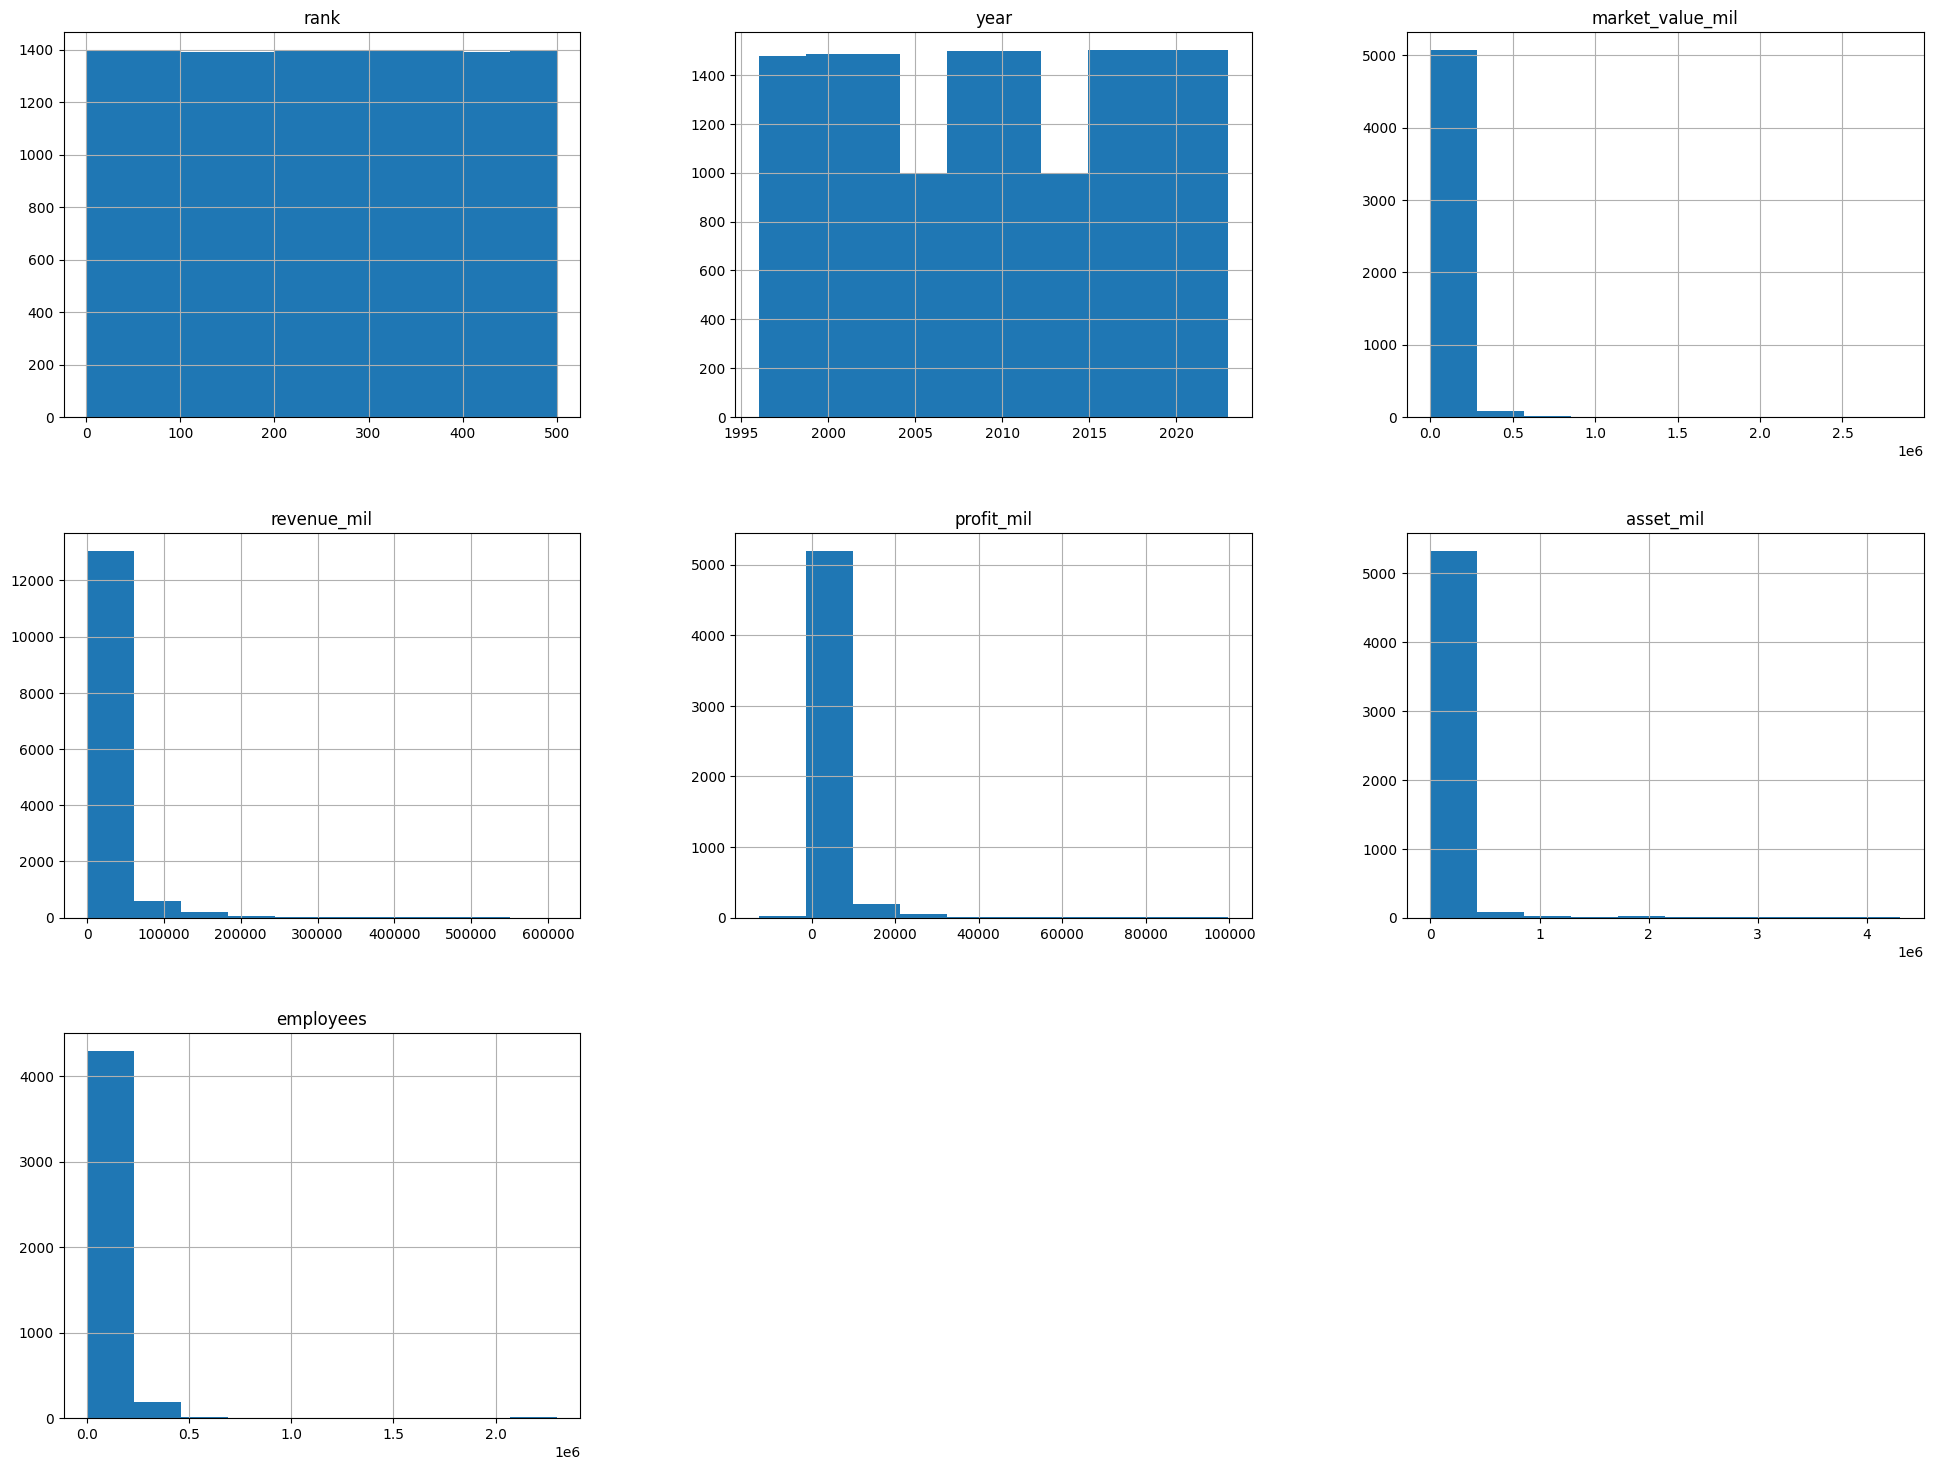

In [19]:
df.hist(figsize=(24,18))

1.Average Revenue generated by industries over years
-


In [20]:
# Drop rows with missing required values
df_clean = df.dropna(subset=['industry', 'year', 'revenue_mil'])

In [21]:
# Group by year and industry, compute average revenue
avg_revenue = (
    df_clean
    .groupby(['year', 'industry'])['revenue_mil']
    .mean()
    .reset_index()
)

In [22]:
avg_revenue

,year,industry,revenue_mil
0,1996,Aerospace & Defense,14272.875000
1,1996,Airlines,9077.600000
2,1996,Apparel,5884.950000
3,1996,"Automotive Retailing, Services",5167.400000
4,1996,Beverages,10015.750000
...,...,...,...
1945,2023,Waste Management,16604.500000
1946,2023,Wholesalers: Diversified,13152.272727
1947,2023,Wholesalers: Electronics and Office Equipment,41259.666667
1948,2023,Wholesalers: Food and Grocery,37691.600000


In [23]:
avg_revenue.rename(columns={'revenue_mil': 'Revenue'})

,year,industry,Revenue
0,1996,Aerospace & Defense,14272.875000
1,1996,Airlines,9077.600000
2,1996,Apparel,5884.950000
3,1996,"Automotive Retailing, Services",5167.400000
4,1996,Beverages,10015.750000
...,...,...,...
1945,2023,Waste Management,16604.500000
1946,2023,Wholesalers: Diversified,13152.272727
1947,2023,Wholesalers: Electronics and Office Equipment,41259.666667
1948,2023,Wholesalers: Food and Grocery,37691.600000


In [32]:
# Filter top industries by revenue (to reduce clutter in the plot)
top_industries = (
    df_clean.groupby('industry')['revenue_mil']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
    .tolist()
)

In [25]:
top_industries

['Petroleum Refining',
 'General Merchandisers',
 'Commercial Banks',
 'Motor Vehicles & Parts',
 'Insurance: Property and Casualty (Stock)',
 'Telecommunications',
 'Food & Drug Stores',
 'Diversified Financials',
 'Computers, Office Equipment',
 'Wholesalers: Health Care']

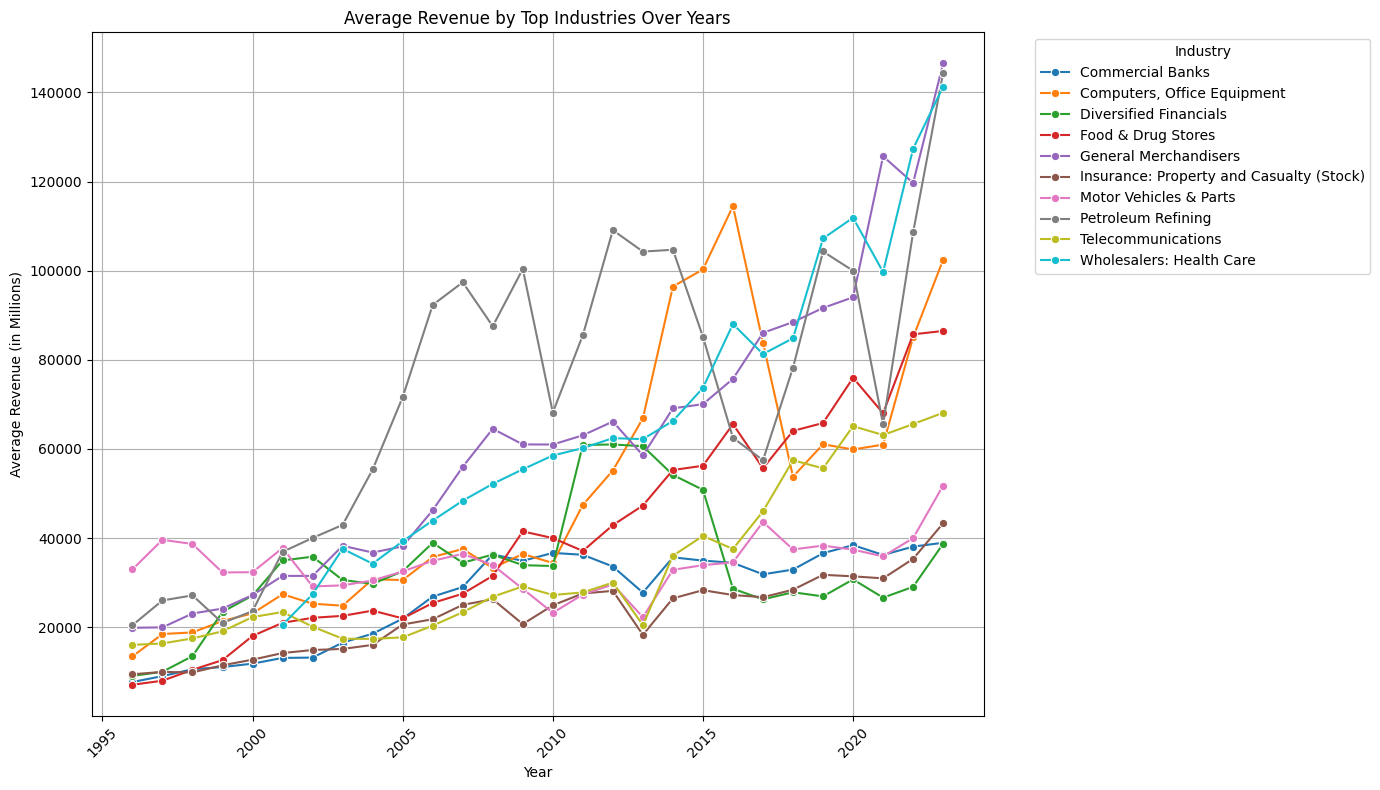

In [33]:

avg_revenue_top = avg_revenue[avg_revenue['industry'].isin(top_industries)]

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=avg_revenue_top,
    x='year',
    y='revenue_mil',
    hue='industry',
    marker='o'
)
plt.title("Average Revenue by Top Industries Over Years")
plt.xlabel("Year")
plt.ylabel("Average Revenue (in Millions)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


2.Geographic Concentration & Expansion
-

In [36]:
#  Clean and filter data
df_clean = df.dropna(subset=['revenue_mil', 'headquarters_state', 'industry'])

In [48]:
# Get top 10 states by total revenue
top_states = (
    df_clean.groupby('headquarters_state')['revenue_mil']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

In [49]:
# Filter for only top states
top_state_industry = state_industry_revenue[state_industry_revenue['headquarters_state'].isin(top_states)]

# Pivot for stacked bar chart
pivot_df = top_state_industry.pivot(index='headquarters_state', columns='industry', values='revenue_mil').fillna(0)

In [51]:
# Keep only top industries across these states to reduce clutter
top_industries = pivot_df.sum().sort_values(ascending=False).head(10).index
pivot_df = pivot_df[top_industries]

In [55]:
us_state_abbrev_to_name = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut',
    'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii',
    'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine',
    'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan',
    'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire',
    'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania',
    'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia'
}

# Replace abbreviations with full names in the pivot_df index
pivot_df.index = pivot_df.index.map(lambda x: us_state_abbrev_to_name.get(x, x))


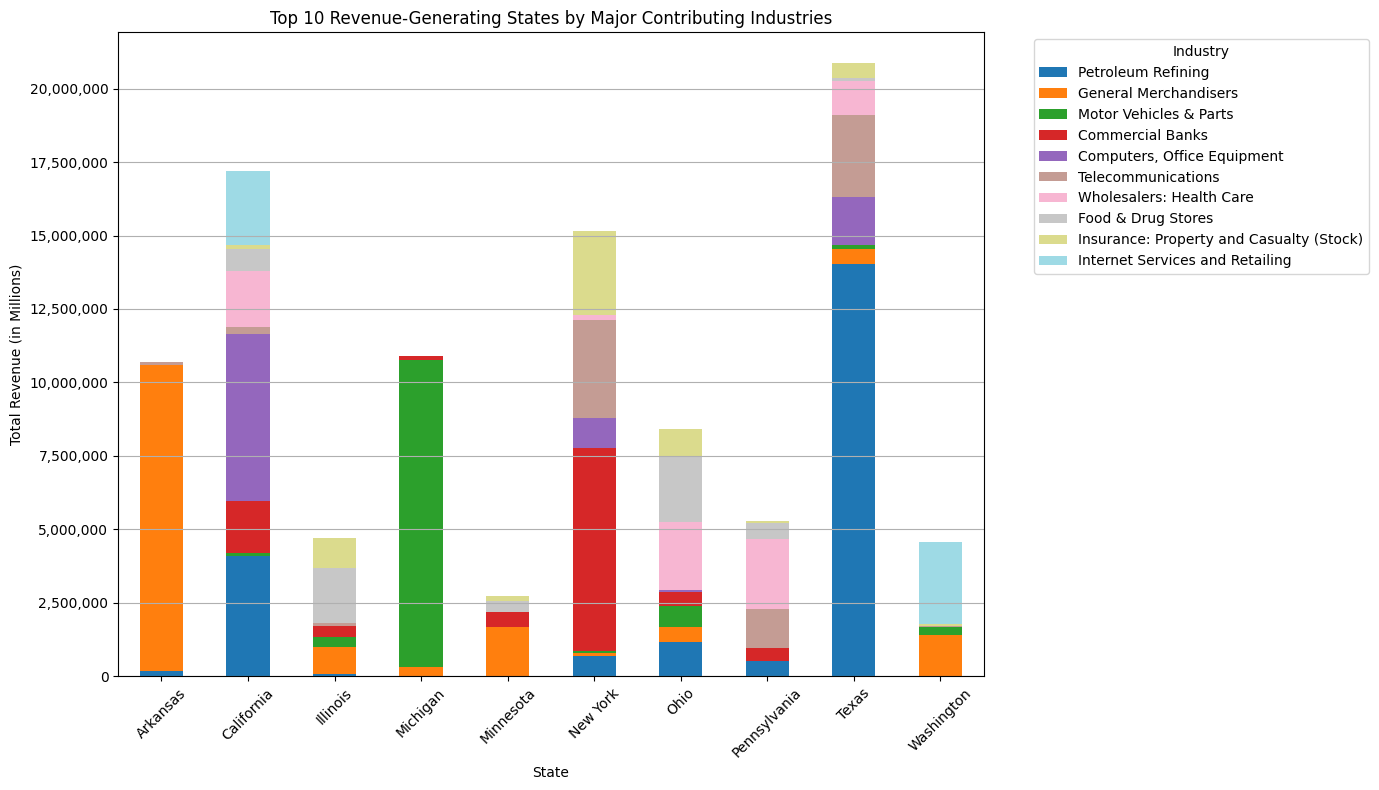

In [56]:
import matplotlib.ticker as mticker

# When calling the plot
ax = pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    colormap='tab20'
)

# Turn off scientific notation
ax.ticklabel_format(style='plain', axis='y')

# Format y-axis ticks as comma-separated numbers
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add labels and title
plt.title("Top 10 Revenue-Generating States by Major Contributing Industries")
plt.xlabel("State")
plt.ylabel("Total Revenue (in Millions)")
plt.xticks(rotation=45)
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


3.Workforce & Employment
-

In [72]:
from matplotlib import style

# Apply fivethirtyeight style
style.use("fivethirtyeight")

In [73]:
# Drop rows with missing employee or sector data
df_emp = df.dropna(subset=['employees', 'sector'])

# Group by sector and sum employees
sector_employment = (
    df_emp.groupby('sector')['employees']
    .sum()
    .sort_values(ascending=True)
)

C:\Users\PRP\AppData\Local\Temp\ipykernel_94652\110278270.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


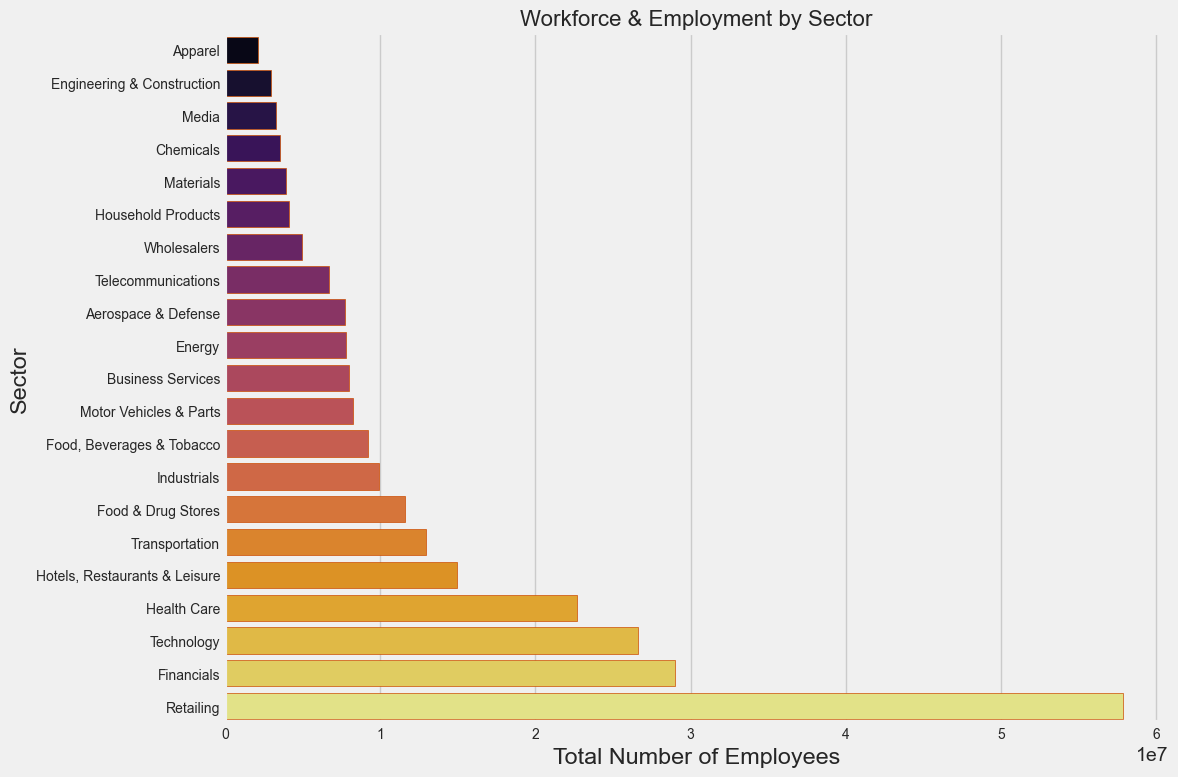

In [74]:

# Plot using seaborn and fivethirtyeight style
plt.figure(figsize=(12, 8))
sns.barplot(
    y=sector_employment.index,
    x=sector_employment.values,
    palette='inferno',
    edgecolor=sns.color_palette("YlOrBr_r", 3)
)

# Aesthetics
plt.title("Workforce & Employment by Sector", fontsize=16)
plt.xlabel("Total Number of Employees")
plt.ylabel("Sector")
plt.xticks(size=10)
plt.yticks(size=10)
plt.tight_layout()
plt.show()


In [76]:
from matplotlib.ticker import FuncFormatter

# Clean the data
df_clean = df.dropna(subset=['year', 'sector', 'employees'])

# Identify top 10 hiring sectors by total employees
top_10_sectors = (
    df_clean.groupby('sector')['employees']
    .sum()
    .nlargest(10)
    .index
)

In [77]:
# Filter dataset to include only these sectors
df_top_sectors = df_clean[df_clean['sector'].isin(top_10_sectors)]

# Group by year and sector
emp_sector_year = (
    df_top_sectors.groupby(['year', 'sector'])['employees']
    .sum()
    .reset_index()
)

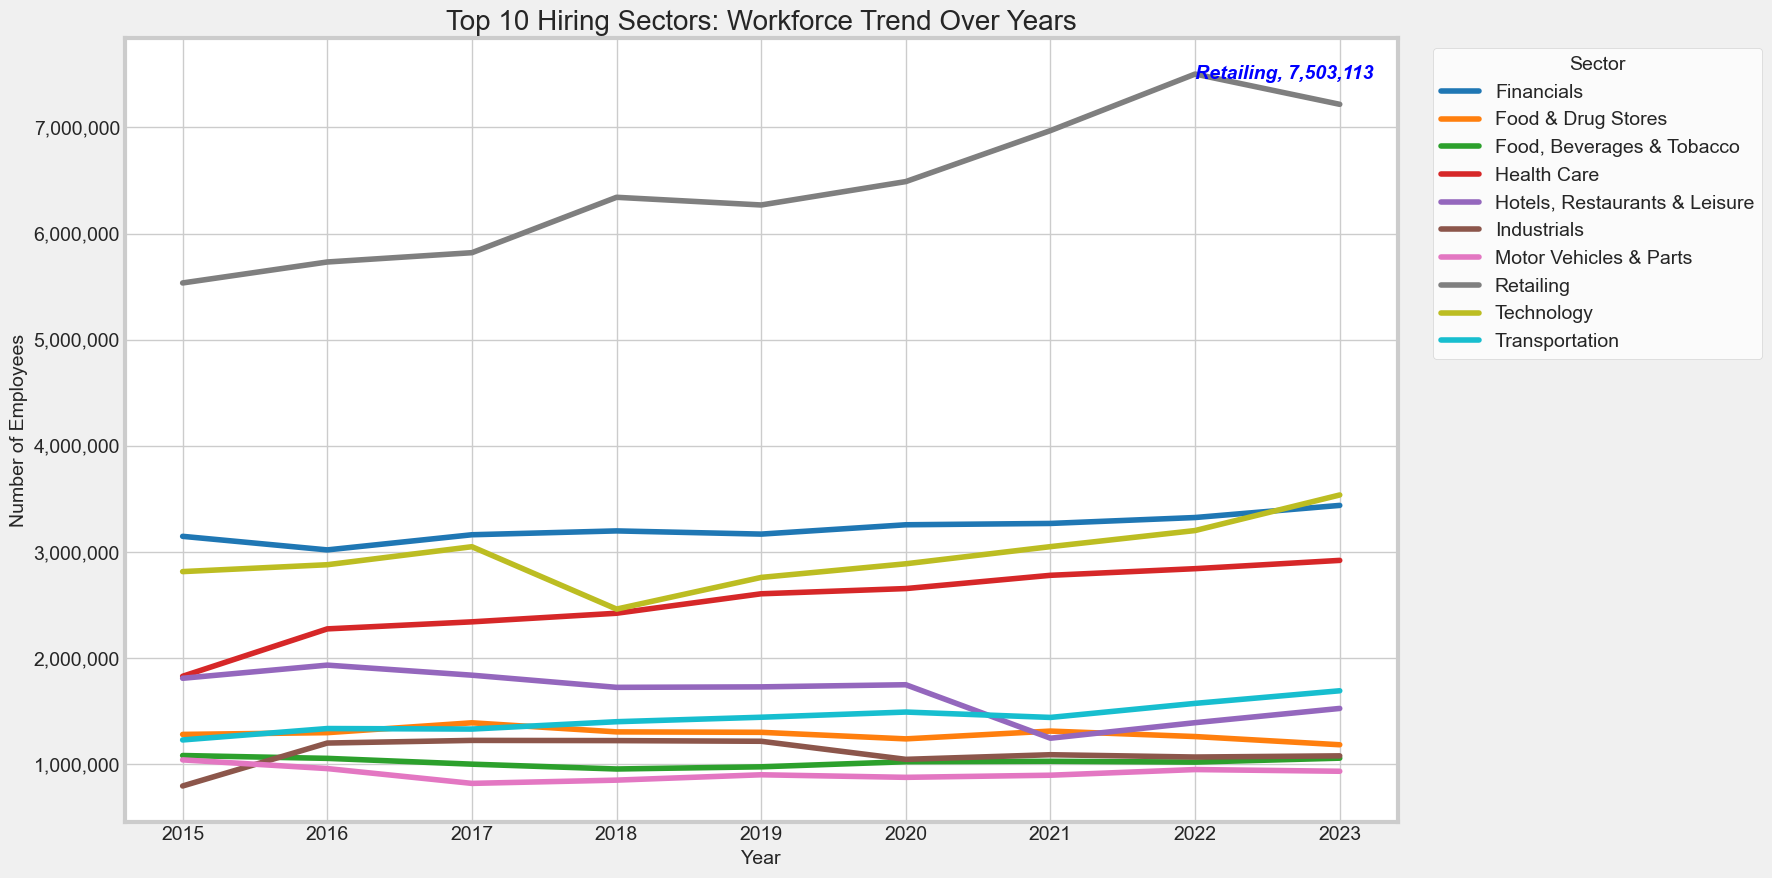

In [78]:

# Plot
plt.figure(figsize=(18, 9))
sns.set_style("whitegrid")

ax = sns.lineplot(
    data=emp_sector_year,
    x='year',
    y='employees',
    hue='sector',
    palette='tab10'
)

# Format y-axis to show full numbers with commas
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Titles and labels
plt.title('Top 10 Hiring Sectors: Workforce Trend Over Years', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)
plt.legend(title='Sector', bbox_to_anchor=(1.02, 1), loc='upper left')

# Annotate the peak employment point
peak = emp_sector_year.loc[emp_sector_year['employees'].idxmax()]
ax.text(
    peak['year'], peak['employees'],
    f"{peak['sector']}, {int(peak['employees']):,}",
    verticalalignment='center',
    fontstyle='italic',
    fontweight='bold',
    color='blue'
)

plt.tight_layout()
plt.show()


4.Financial Health & Stability
--

In [8]:
top_10_industries = (
    df.groupby('industry')['revenue_mil']
    .sum()
    .nlargest(5)
    .index
)
df_top = df[df['industry'].isin(top_10_industries)]


In [9]:
# Clean and convert to avoid division by 0 or NaNs
df_top = df_top.copy()
df_top['asset_turnover'] = df_top['revenue_mil'] / df_top['asset_mil']



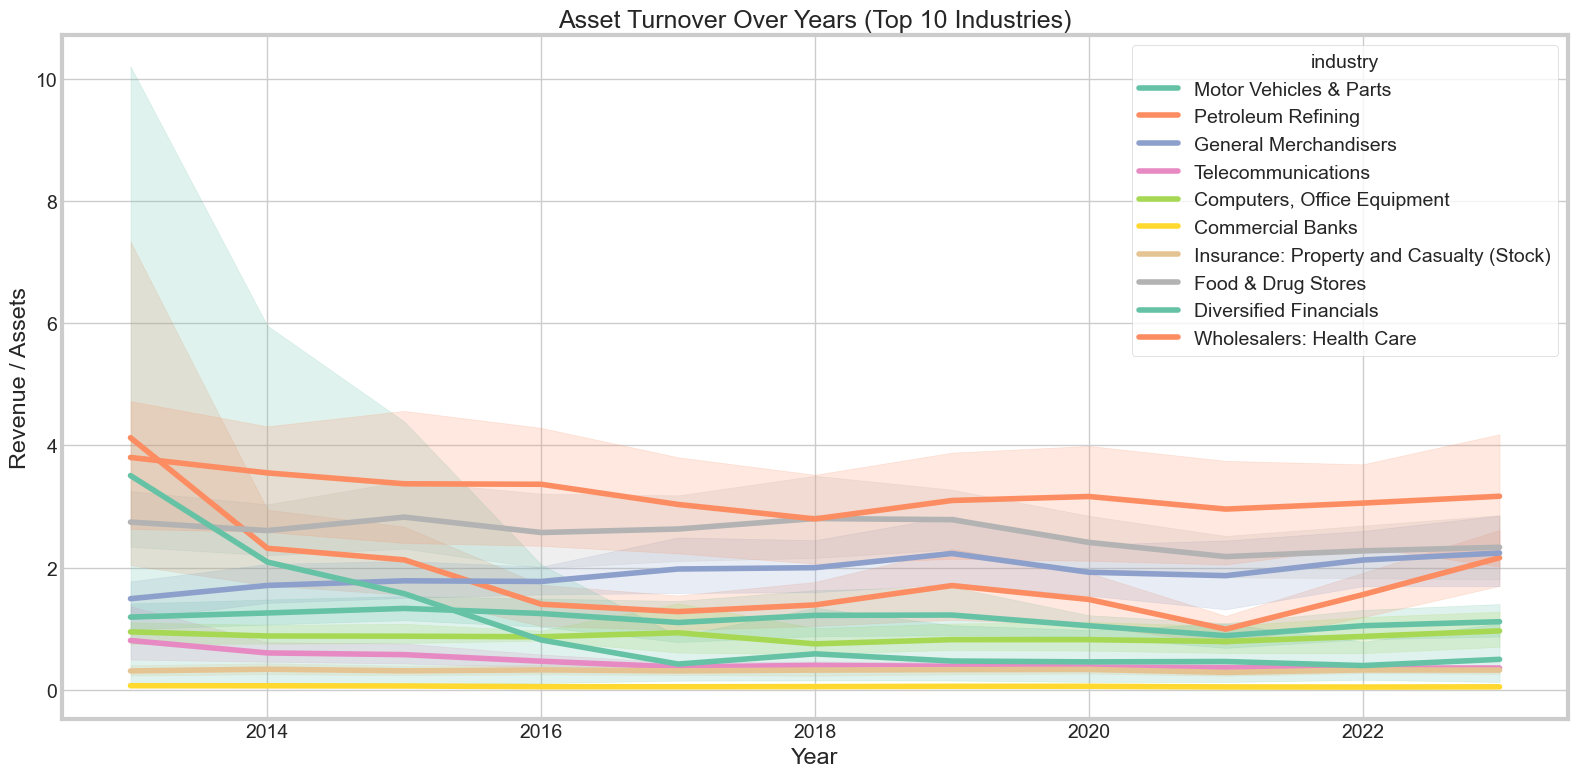

In [70]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=df_top, x='year', y='asset_turnover', hue='industry', palette='Set2')
plt.title('Asset Turnover Over Years (Top 10 Industries)', fontsize=18)
plt.ylabel('Revenue / Assets')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
df['asset_mil'] = pd.to_numeric(df['asset_mil'], errors='coerce')
df['revenue_mil'] = pd.to_numeric(df['revenue_mil'], errors='coerce')
df['profit_mil'] = pd.to_numeric(df['profit_mil'], errors='coerce')
df_clean = df.dropna(subset=['industry', 'asset_mil', 'revenue_mil', 'profit_mil'])

In [18]:
# Group by industry
grouped = df_clean.groupby('industry')[['asset_mil', 'revenue_mil', 'profit_mil']].sum()

In [19]:
# Function to plot pie with distinct "Others" color
def plot_pie(data, column, title):
    sorted_data = data.sort_values(column, ascending=False)
    top = sorted_data.head(10).copy()  # top 10 industries
    others_sum = sorted_data[column].iloc[10:].sum()
    
    # Add 'Others' row
    if others_sum > 0:
        top.loc['Others'] = [others_sum] * len(top.columns)

    # Prepare colors: use tab10 + manual gray for "Others"
    base_colors = plt.cm.tab10.colors
    colors = list(base_colors[:10])  # up to 10 industries
    if 'Others' in top.index:
        colors.append('#7f7f7f')  # gray for "Others"

    # Plot
    plt.figure(figsize=(10, 10))
    plt.pie(top[column], labels=top.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(title, fontsize=20)
    plt.show()

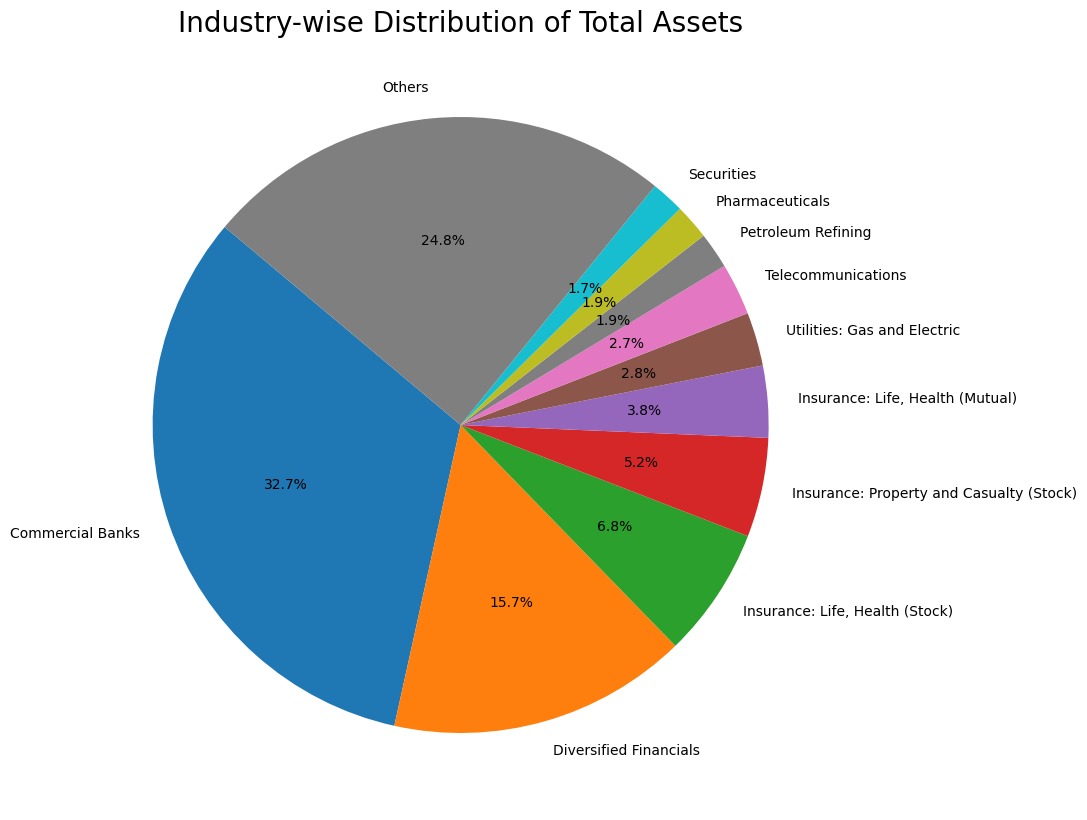

In [20]:
plot_pie(grouped, 'asset_mil', 'Industry-wise Distribution of Total Assets')

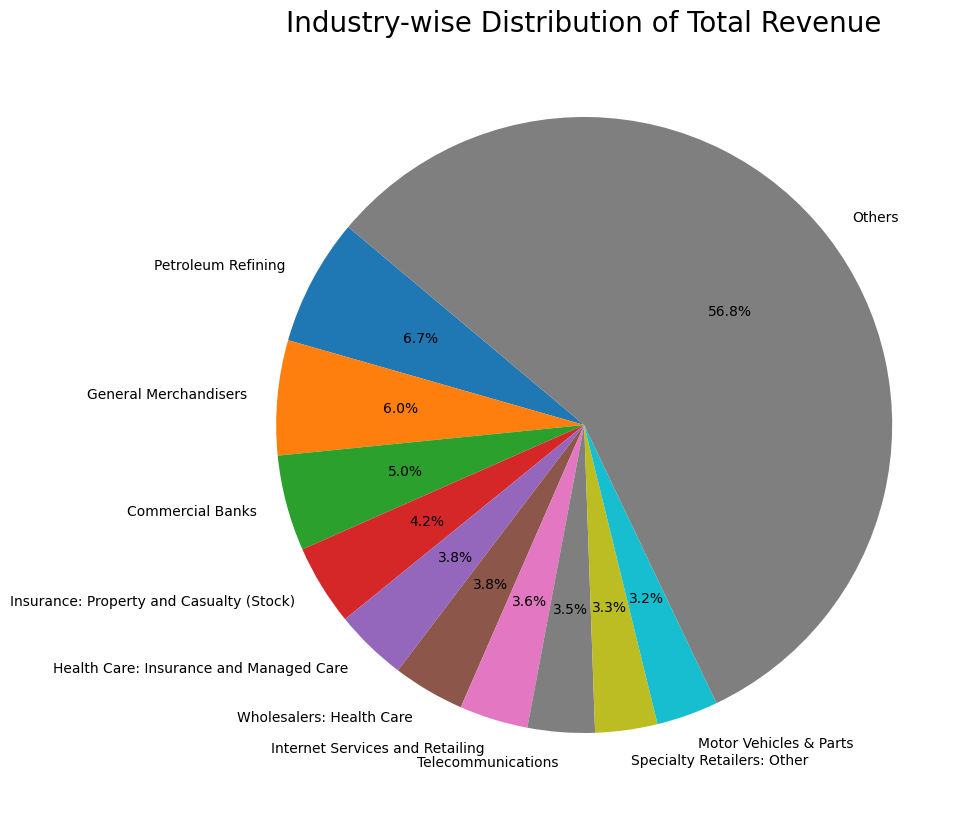

In [21]:
plot_pie(grouped, 'revenue_mil', 'Industry-wise Distribution of Total Revenue')

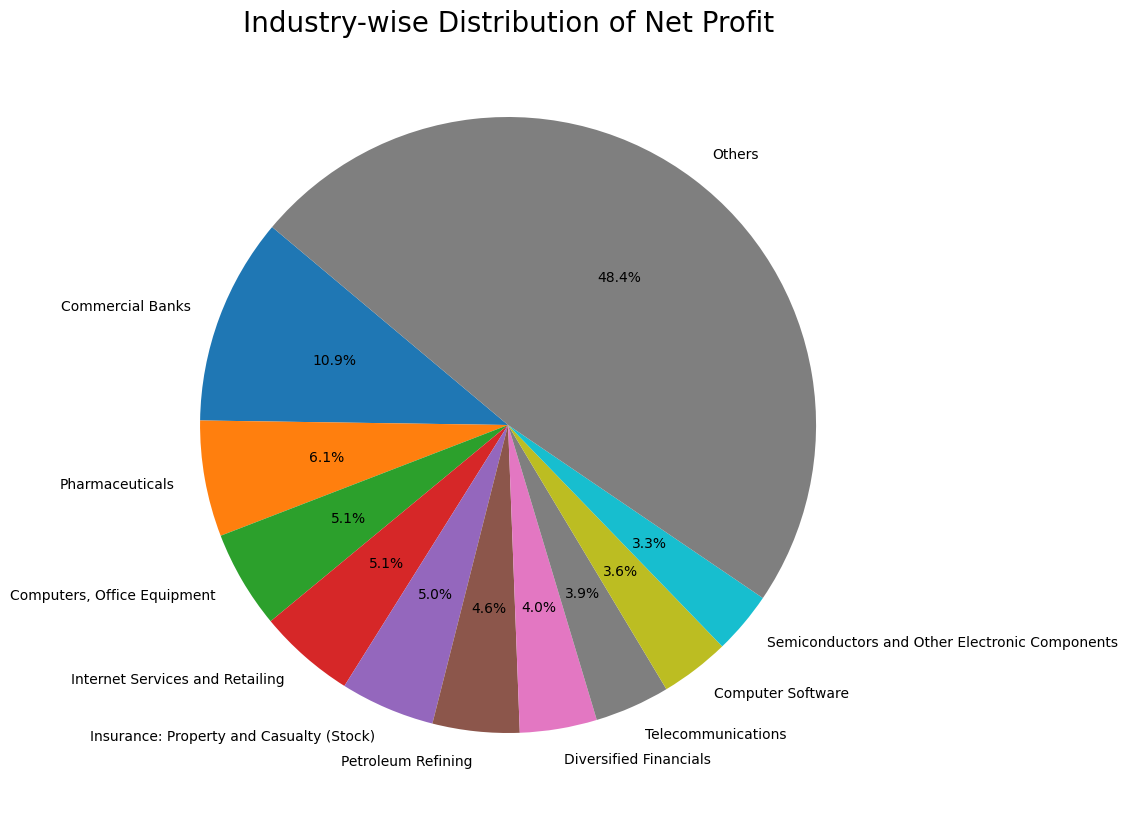

In [22]:

plot_pie(grouped, 'profit_mil', 'Industry-wise Distribution of Net Profit')


In [12]:
# Ensure profit column is numeric
df['profit_mil'] = pd.to_numeric(df['profit_mil'], errors='coerce')

# Drop rows with missing year, industry, or profit
df_clean = df.dropna(subset=['year', 'industry', 'profit_mil'])

# Total profit per industry
total_profit_by_industry = df_clean.groupby('industry')['profit_mil'].sum().sort_values(ascending=False)

# Top 5 industries by total profit
top5_industries = total_profit_by_industry.head(5).index.tolist()

# Filter data to only those industries
top5_data = df_clean[df_clean['industry'].isin(top5_industries)]

# Group by year and industry to get yearly profit
yearly_profit = top5_data.groupby(['year', 'industry'])['profit_mil'].sum().reset_index()

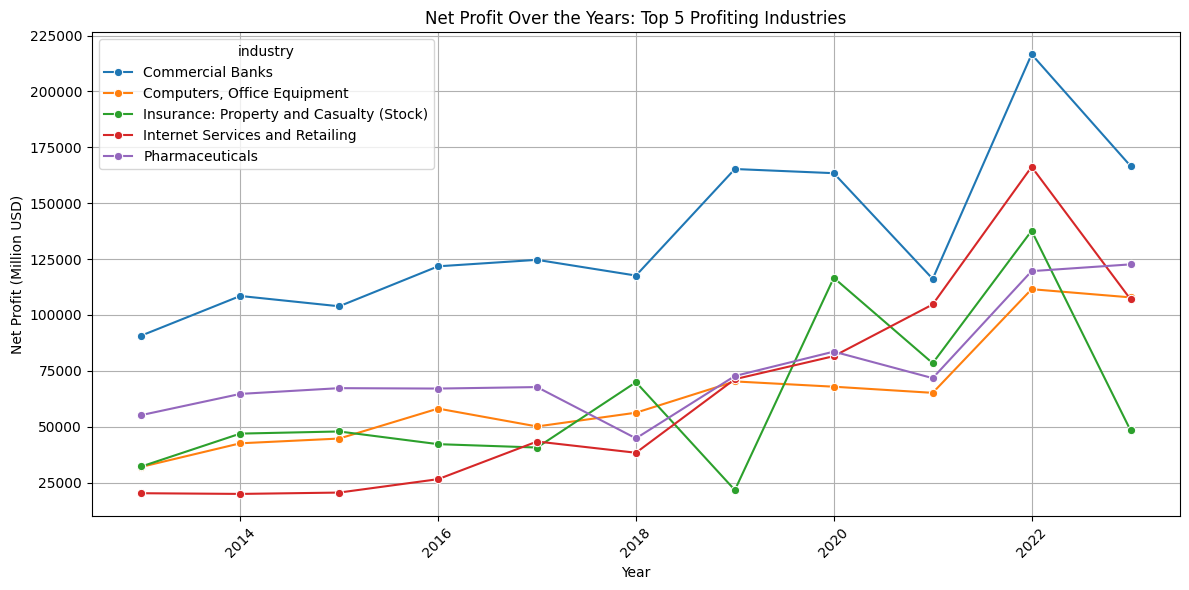

In [13]:

#  Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_profit, x='year', y='profit_mil', hue='industry', marker='o')
plt.title('Net Profit Over the Years: Top 5 Profiting Industries')
plt.ylabel('Net Profit (Million USD)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


5 Rank Variation
-

In [14]:


# Ensure 'rank' and 'year' columns are numeric
df['rank'] = pd.to_numeric(df['rank'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Filter rows with rank == 1
top_ranked_per_year = df[df['rank'] == 1].sort_values('year')

# Display results
print(top_ranked_per_year[['year', 'name', 'rank', 'revenue_mil', 'profit_mil']])


       year                        name  rank  revenue_mil  profit_mil
0      1996  General Motors Corporation     1     168828.6         NaN
491    1997  General Motors Corporation     1     168369.0         NaN
985    1998  General Motors Corporation     1     178174.0         NaN
1479   1999  General Motors Corporation     1     161315.0         NaN
1978   2000  General Motors Corporation     1     189058.0         NaN
2471   2001     Exxon Mobil Corporation     1     210392.0         NaN
2964   2002       Wal-Mart Stores, Inc.     1     219812.0         NaN
3456   2003       Wal-Mart Stores, Inc.     1     246525.0         NaN
3954   2004       Wal-Mart Stores, Inc.     1     258681.0         NaN
4450   2005       Wal-Mart Stores, Inc.     1     288189.0         NaN
4946   2006     Exxon Mobil Corporation     1     339938.0         NaN
5445   2007       Wal-Mart Stores, Inc.     1     351139.0         NaN
5944   2008       Wal-Mart Stores, Inc.     1     378799.0         NaN
6443  

C:\Users\PRP\AppData\Local\Temp\ipykernel_94652\3246557222.py:35: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PRP\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


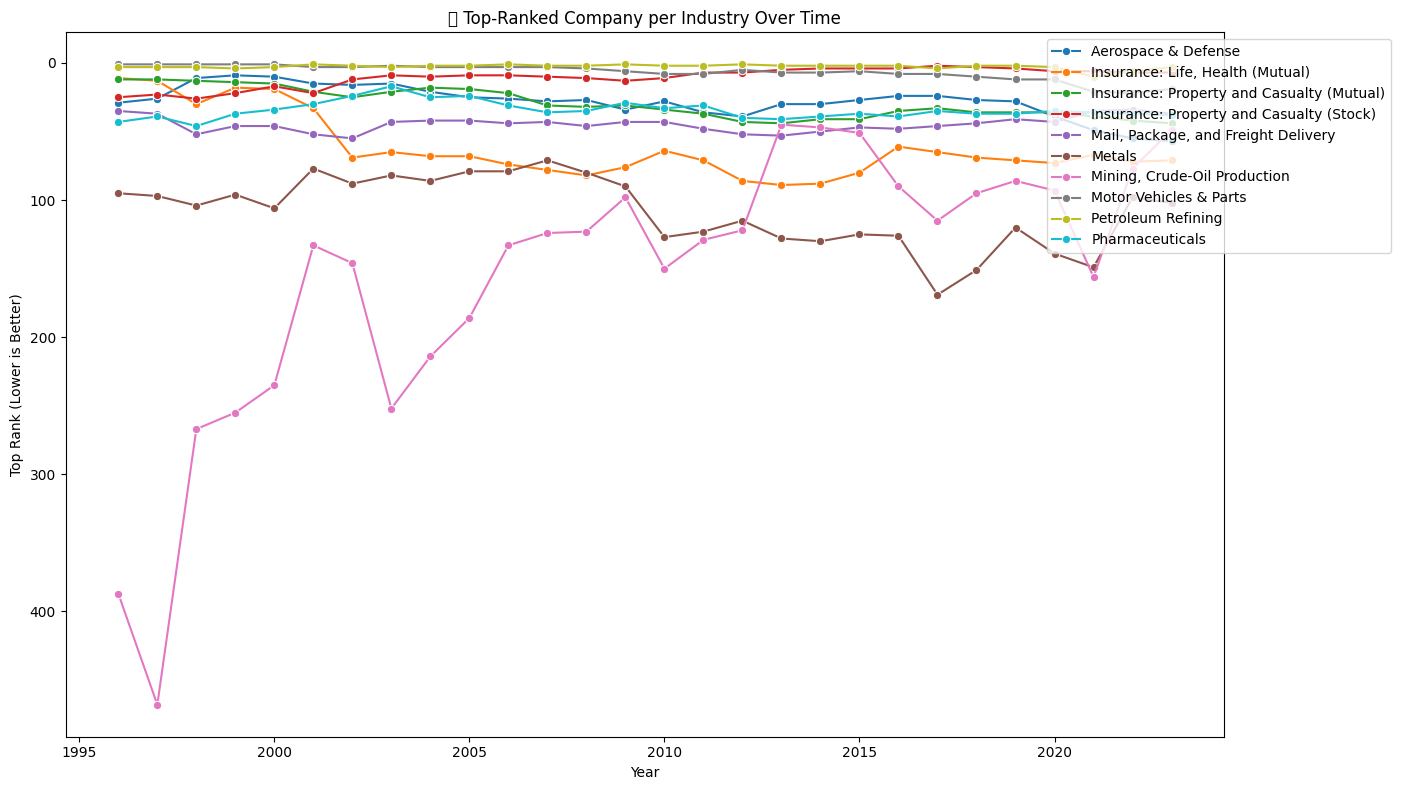

In [11]:


# Ensure correct data types
df['rank'] = pd.to_numeric(df['rank'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['rank', 'industry', 'year'])

# ✅ Get the top (lowest) rank per industry per year
top_ranks = df.loc[df.groupby(['year', 'industry'])['rank'].idxmin()]

# Optional: Keep only most frequent industries for clarity
top_industries = top_ranks['industry'].value_counts().nlargest(10).index
top_ranks = top_ranks[top_ranks['industry'].isin(top_industries)]

# 📊 Plot
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=top_ranks,
    x='year',
    y='rank',
    hue='industry',
    marker='o'
)

plt.gca().invert_yaxis()  # Rank 1 is top
plt.title("🏆 Top-Ranked Company per Industry Over Time")
plt.xlabel("Year")
plt.ylabel("Top Rank (Lower is Better)")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()


In [13]:
dff=df[ df['year']==1996]